# Legends
Here we show how to edit the Legends to a plot, show typical pitfalls
and how to avoid/solve/workaround them.

### Get Example Data

In [42]:
import plotastic as plst

# Import Example Data
# DF, _dims = plst.load_dataset("fmri", verbose=False)
DF, dims = plst.load_dataset("tips", verbose=False)

DF.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,size-cut
0,0,16.99,1.01,Female,No,Sun,Dinner,2,1-2
1,1,10.34,1.66,Male,No,Sun,Dinner,3,>=3
2,2,21.01,3.50,Male,No,Sun,Dinner,3,>=3
3,3,23.68,3.31,Male,No,Sun,Dinner,2,1-2
4,4,24.59,3.61,Female,No,Sun,Dinner,4,>=3


In [43]:
# Define dimensions explicitly
dims = dict(
    y="tip",
    x="size-cut",
    hue="smoker",
    row="time",
    col="sex",
)

# Make DataAnalysis object
DA = plst.DataAnalysis(
    data=DF,  # Dataframe
    dims=dims,  # Dictionary with y, x, hue, col, row
    # subject="subject",  # Data is paired by subject (optional)
    verbose=True,  # Print out Info about the Data
)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
🫠 GROUPS UNEQUAL: Groups (16 total) have different samplesizes (n = 15.2
   ±11.9).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                                    |   tip |
   |:-----------------------------------|------:|
   | ('Dinner', 'Male', 'No', '1-2')    |    41 |
   | ('Dinner', 'Male', 'No', '>=3')    |    36 |
   | ('Dinner', 'Male', 'Yes', '1-2')   |    31 |
   | ('Lunch', 'Female', 'No', '1-2')   |    19 |
   | ('Dinner', 'Female', 'Yes', '1-2') |    18 |
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['time', 'sex', 'smoker', 'size-cut'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.


## Display correct labels
Legend uses handles and labels from the plot that was previously called! 

### *"Wrong"*:
Legend Labels are useless, since  `fillaxes(kind="bar",
fill=False)` removes colors from the barplot!

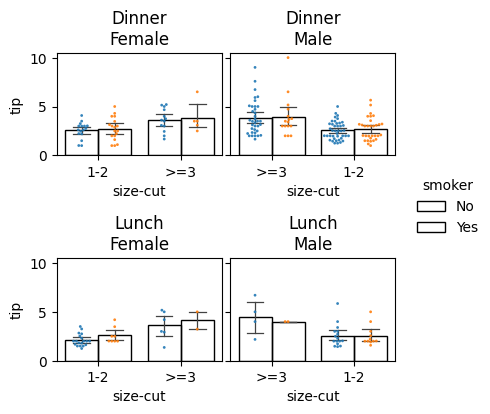

In [44]:
(
    DA.subplots(figsize=(4, 4), hspace=1)
    .fillaxes(kind="swarm", s=2, alpha=0.9, dodge=True)
    .fillaxes(kind="bar", fill=False, errwidth=0.9, capsize=0.2)
    .edit_legend()  # !! Calling Legend here uses labels from barplot!
)

### *Correct:*

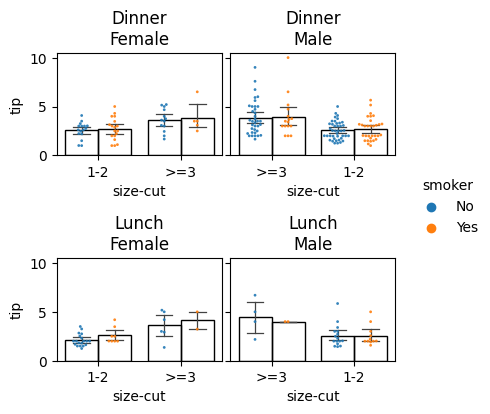

In [45]:
(
    DA.subplots(figsize=(4, 4), hspace=1)
    .fillaxes(kind="swarm", s=2, alpha=0.9, dodge=True)
    .edit_legend()  # !! Calling Legend here uses labels from swarmplot!
    .fillaxes(kind="bar", fill=False, errwidth=0.9, capsize=0.2)
)

## Positioning: It's always center right
- Use `pad` to modify distance to plot
- This doesn't work well in combination with matplotlib parameters, like
  `bbox_to_anchor`!

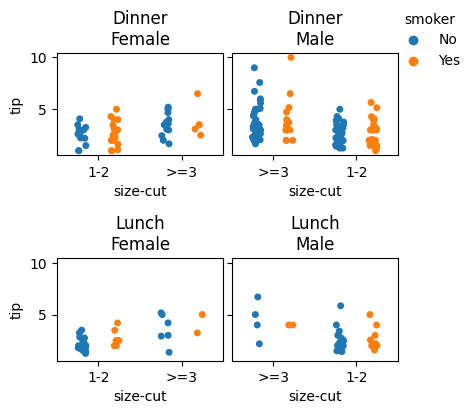

In [46]:
(
    DA.subplots(figsize=(4, 4), hspace=1)
    .fillaxes(kind="strip", dodge=True)
    .edit_legend(pad=0, loc="upper right")
)

## Other Positions
- Use `bbox_to_anchor` to specify the exact position of the legend
  - It tends to work better than `loc`, since legend might be cut off.
- `borderaxespad` adds space between plot and legend
- This requires some trial and error!

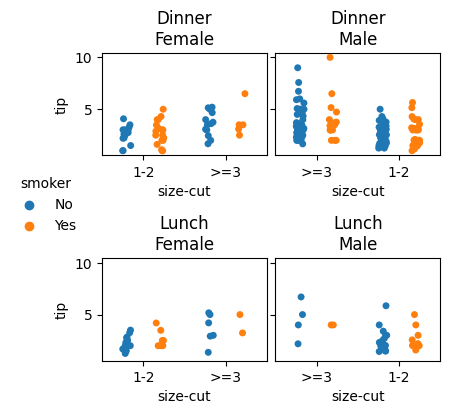

In [47]:
(
    DA.subplots(figsize=(4, 4), hspace=1)
    .fillaxes(kind="strip", dodge=True)
    .edit_legend(
        borderaxespad=-3,  # Move legend closer to axes. Use with
        bbox_to_anchor=(0, 0.5),  # (x, y) in percent, 0.5 = center
        # loc="center left", # Not needed with bbox_to_anchor
    )
)

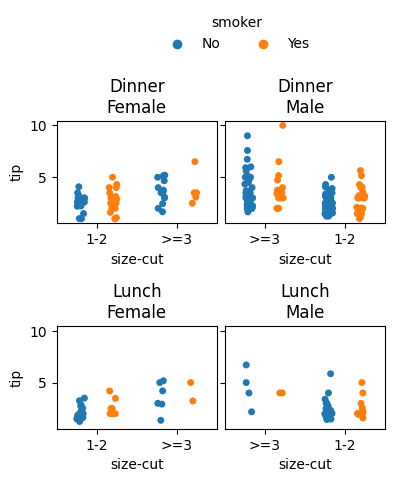

In [49]:
(
    DA.subplots(figsize=(4, 4), hspace=1)
    .fillaxes(kind="strip", dodge=True)
    .edit_legend(
        borderaxespad=-3,  # Move legend closer to axes. Use with
        bbox_to_anchor=(0.5, 1.1),  # (x, y) in percent, 0.5 = center
        ncol=2,
    )
)